## Problem description

The problem describes a heat source embedded in a fluid-saturated porous medium.
The spherical symmetry is modeled using a 10 m x 10 m disc with a point heat source ($Q=150\;\mathrm{W}$) placed at one corner ($r=0$) and a curved boundary at $r=10\;\mathrm{m}$. Applying rotational axial symmetry at one of the linear boundaries, the model region transforms into a half-space configuration of the spherical symmetrical problem.
The initial temperature and the pore pressure are 273.15 K and 0 Pa, respectively.
The axis-normal displacements along the symmetry (inner) boundaries were set to zero, whereas the pore pressure, as well as the temperature, are set to their initial values along the outer (curved) boundary.
The heat coming from the point source is propagated through the medium, causing the fluid and the solid to expand at different rates.
The resulting pore pressure (gradient) is triggering a thermally driven consolidation process caused by the fluid flow away from the heat source until equilibrium is reached.
The corresponding derivation of the analytical solution can be found in the works cited below.
The main project input file is `pointheatsource_quadratic-mesh.prj`. Geometry and mesh are stored in `quarter_circle_geometry.gml` and `quarter_002_2nd.vtu`.

## Equations

The problem equations can be found in the original work of Booker and Savvidou (1985) or Chaudhry et al. (2019).
The analytical solution of the coupled THM consolidation problem can be expressed in terms of some derived parameters:

\begin{equation}
    \kappa = \dfrac{K}{m}
\end{equation}
\begin{equation}\label{eq:consolidation}
    c = \dfrac{k_\text{s}}{\eta}\left(\lambda + 2G\right)
\end{equation}
\begin{equation}
    X = a_\text{u}\left(\lambda+2G\right)-b^{\prime}
\end{equation}
\begin{equation}
    Y = \dfrac{1}{\lambda+2G}\left(\dfrac{X}{\left(1-\dfrac{c}{\kappa}\right)a_\text{u}}+\dfrac{b^{\prime}}{a_\text{u}}\right)
\end{equation}
\begin{equation}
    Z = \dfrac{1}{\lambda+2G}\left(\dfrac{X}{\left(1-\dfrac{c}{\kappa}\right)a_\text{u}}\right)
\end{equation}
\begin{equation}
    r =\sqrt{x_{1}^{2}+x_{2}^{2}+x_{3}^{2}}
\end{equation}
\begin{equation}
    f^{A}=\text{erfc}\left(\dfrac{r}{2\sqrt{At}}\right),\quad A=\kappa,c
\end{equation}
\begin{equation}
    g^{A}=\dfrac{At}{r^{2}}+\left(\frac{1}{2}-\dfrac{At}{r^{2}}\right)f^{A}-\sqrt{\dfrac{At}{\pi r^{2}}} \exp\left(-\dfrac{r^{2}}{4At}\right)
\end{equation}
\begin{equation}
    g^{\ast} = Yg^{\kappa}-Zg^{c}
\end{equation}

and

\begin{equation}
    g^{A}\_{,i} = \dfrac{2x\_{i}At}{r^{4}}\left(f^{A}-1+\dfrac{r}{\sqrt{\pi At}}\exp\left(-\dfrac{r^{2}}{4At}\right)\right),\quad i=1,2,3
\end{equation}
\begin{equation}
    g^{\ast}\_{,i} = Yg^{\kappa}\_{,i}-Zg^{c}\_{,i}
\end{equation}

For the temperature, porepressure and displacements, the correct solution can be found in the original work:
\begin{equation}
    \Delta T = \dfrac{Q}{4\pi Kr}f^{\kappa}
\end{equation}
\begin{equation}
    p = \dfrac{X\,Q}{\left(1-\dfrac{c}{\kappa}\right)4\pi Kr}\left(f^{\kappa}-f^{c}\right)
\end{equation}
\begin{equation}
    u_{i} = \dfrac{Q a_\text{u}x_{i}}{4\pi Kr}\;g^{\ast}
\end{equation}

For the stress components the corrected expressions can be found in the work of Chaudhry et al. (2019):

\begin{equation}
    \sigma^{\prime}\_{ij,|,j=i} = \dfrac{Q a\_\text{u}}{4\pi Kr}\left( 2G\left[g^{\ast}\left(1-\dfrac{x^{2}\_{i}}{r^{2}}\right)+x\_{i}g^{\ast}\_{,i}\right]+\lambda \left[x\_{i}g^{\ast}\_{,i}+2g^{\ast}\right]\right)-b^{\prime}\Delta T
\end{equation}
\begin{equation}
    \sigma^{\prime}\_{ij,|,j \neq i} = \dfrac{Q a\_\text{u}}{4\pi Kr}\left( G\left[x\_{i}g^{\ast}\_{,j}+x\_{j}g^{\ast}\_{,i}-2g^{\ast}\dfrac{x\_{i}x\_{j}}{r^{2}}\right]\right)
\end{equation}



## Model prepation and OGS run


In [167]:
import os
from ogs6py import ogs

prj_name_lin = "pointheatsource_linear-mesh.prj"
prj_name_quad = "pointheatsource_quadratic-mesh.prj"
data_dir = os.environ.get('OGS_DATA_DIR', '../../Data')
prj_file_lin = f"{data_dir}/ThermoHydroMechanics/Linear/Point_injection/{prj_name_lin}"
prj_file_quad = f"{data_dir}/ThermoHydroMechanics/Linear/Point_injection/{prj_name_quad}"
ogs_model_lin = ogs.OGS(INPUT_FILE=prj_file_lin, PROJECT_FILE=f"{data_dir}/ThermoHydroMechanics/Linear/Point_injection/pointheatsource_lin.prj")
ogs_model_quad = ogs.OGS(INPUT_FILE=prj_file_quad, PROJECT_FILE=f"{data_dir}/ThermoHydroMechanics/Linear/Point_injection/pointheatsource_quad.prj")

- setting data for analytical model:

In [168]:
import heatsource
ana_model = heatsource.ANASOL()

ana_model.E = float(ogs_model_lin.tree.find("./parameters/parameter[name='E']/value").text)
ana_model.nu = float(ogs_model_lin.tree.find("./parameters/parameter[name='nu']/value").text)
ana_model.a_s = 3*float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='Solid']/properties/property[name='thermal_expansivity']/value").text)
ana_model.aprime = ana_model.a_s
ana_model.a_w = -float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='AqueousLiquid']/properties/property[name='density']/independent_variable/slope").text)
ana_model.n = float(ogs_model_lin.tree.find("./media/medium/properties/property[name='porosity']/value").text)
ana_model.rho_w = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='AqueousLiquid']/properties/property[name='density']/reference_value").text)
ana_model.rho_s = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='Solid']/properties/property[name='density']/value").text)
ana_model.c_w = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='AqueousLiquid']/properties/property[name='specific_heat_capacity']/value").text)
ana_model.c_s = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='Solid']/properties/property[name='specific_heat_capacity']/value").text)
ana_model.K_w = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='AqueousLiquid']/properties/property[name='thermal_conductivity']/value").text)
ana_model.K_s = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='Solid']/properties/property[name='thermal_conductivity']/value").text)
ana_model.vis = float(ogs_model_lin.tree.find("./media/medium/phases/phase[type='AqueousLiquid']/properties/property[name='viscosity']/value").text)
ana_model.k = float(ogs_model_lin.tree.find("./media/medium/properties/property[name='permeability']/value").text.split(" ")[0])
ana_model.Q = 2*float(ogs_model_lin.tree.find("./parameters/parameter[name='temperature_source_term']/value").text)
ana_model.T0 = float(ogs_model_lin.tree.find("./parameters/parameter[name='temperature_ic']/value").text)
ana_model.Init()

 - increase simulation time:

In [169]:
ogs_model_lin.replace_text("5000000", xpath="./time_loop/processes/process/time_stepping/t_end")
ogs_model_quad.replace_text("5000000", xpath="./time_loop/processes/process/time_stepping/t_end")

- write and run:

In [170]:
ogs_model_lin.write_input()
ogs_model_quad.write_input()
ogs_model_lin.run_model()
ogs_model_quad.run_model()

OGS finished with project file ../../Data/ThermoHydroMechanics/Linear/Point_injection/pointheatsource_lin.prj.
Execution took 364.149382352829 s
OGS finished with project file ../../Data/ThermoHydroMechanics/Linear/Point_injection/pointheatsource_quad.prj.
Execution took 1031.2281892299652 s


## Evaluation and Results

The analytical expressions together with the numerical model can now be evaluated at different points as a function of time or for a given time as a function of their spatial coordinates.

In [171]:
import vtuIO

- point of interest

In [172]:
pts = {"pt0": (0.5,0.5,0.0)}

- time axis for analytical model

In [173]:
import numpy as np
t = np.linspace(0,50000*200,num=201, endpoint=True)

In [174]:
pvd_lin = vtuIO.PVDIO("pointheatsource_linear-mesh.pvd", dim=2)
pvd_quad = vtuIO.PVDIO("pointheatsource_quadratic-mesh.pvd", dim=2)

### Time series plots for temperature, pressure and displacement

Text(0.5, 1.0, 'temperature')

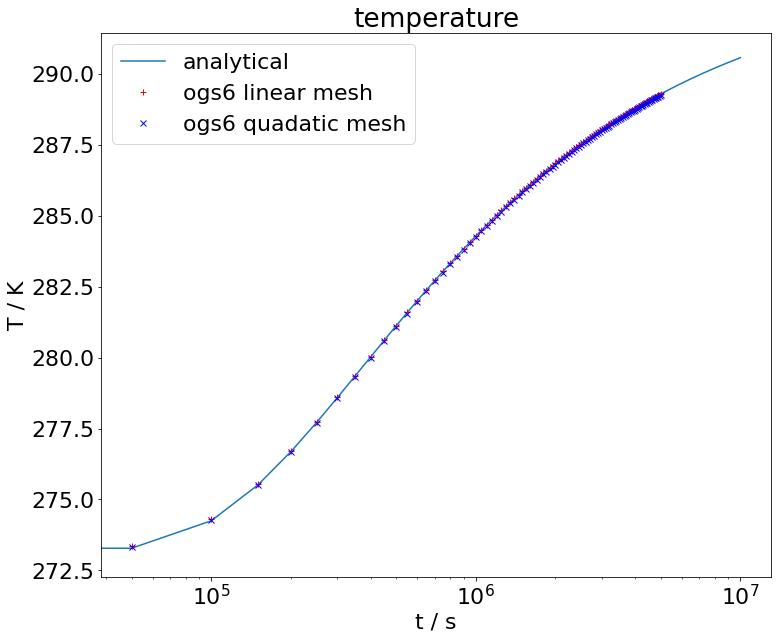

In [175]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] =  22

plt.plot(t,ana_model.temperature(pts["pt0"][0],pts["pt0"][1],pts["pt0"][2],t), label="analytical")
plt.plot(pvd_lin.timesteps, pvd_lin.read_time_series("temperature", pts=pts)["pt0"], "r+", label="ogs6 linear mesh")
plt.plot(pvd_quad.timesteps, pvd_quad.read_time_series("temperature_interpolated", pts=pts)["pt0"], "bx", label="ogs6 quadatic mesh")
plt.xscale("log")
plt.xlabel("t / s")
plt.ylabel("T / K")
plt.legend()
plt.title("temperature")

Text(0.5, 1.0, 'pressure')

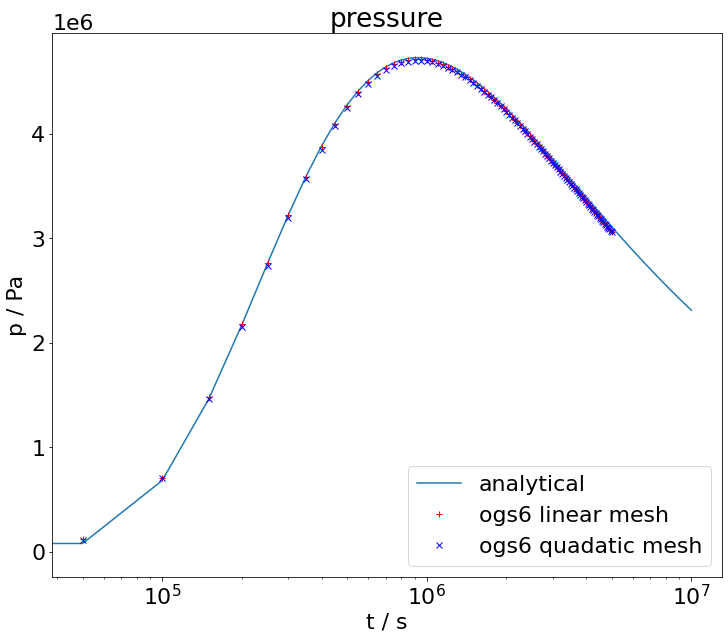

In [176]:
plt.plot(t,ana_model.porepressure(pts["pt0"][0],pts["pt0"][1],pts["pt0"][2],t), label="analytical")
plt.plot(pvd_lin.timesteps, pvd_lin.read_time_series("pressure", pts=pts)["pt0"], "r+", label="ogs6 linear mesh")
plt.plot(pvd_quad.timesteps, pvd_quad.read_time_series("pressure_interpolated", pts=pts)["pt0"], "bx", label="ogs6 quadatic mesh")
plt.xscale("log")
plt.xlabel("t / s")
plt.ylabel("p / Pa")
plt.legend()
plt.title("pressure")

Text(0.5, 1.0, 'displacement')

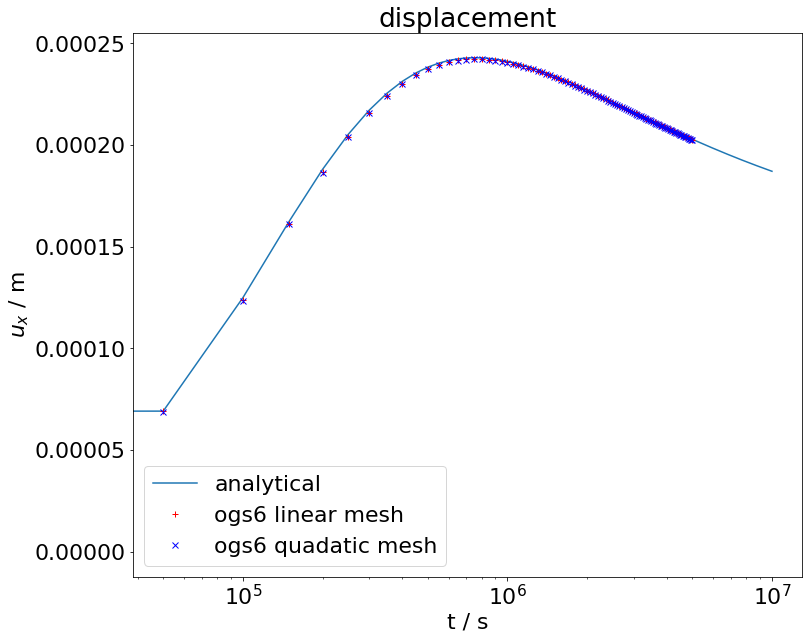

In [177]:
plt.plot(t,ana_model.u_i(pts["pt0"][0],pts["pt0"][1],pts["pt0"][2],t, "x"), label="analytical")
plt.plot(pvd_lin.timesteps, pvd_lin.read_time_series("displacement", pts=pts)["pt0"][:,0], "r+", label="ogs6 linear mesh")
plt.plot(pvd_quad.timesteps, pvd_quad.read_time_series("displacement", pts=pts)["pt0"][:,0], "bx", label="ogs6 quadatic mesh")
plt.xscale("log")
plt.xlabel("t / s")
plt.ylabel("$u_x$ / m")
plt.legend()
plt.title("displacement")

### Plots for temperature, pressure and displacement along the radial axis

In [178]:
limits = {'x': {'temp': (0.0001,2.0), 'press': (0.0001,10.0), 'displ_x': (0.0001,10.0) },
         'y': {'temp': (250.0, 400.0), 'press': (0.001,3.6e7), 'displ_x': (0.00,0.00035)}}

In [179]:
x = np.linspace(start=0.0, stop=10.0, num=100)
r =  [(i,0,0) for i in x]
t_i = 5.0e4

Text(0.5, 1.0, 'temperature')

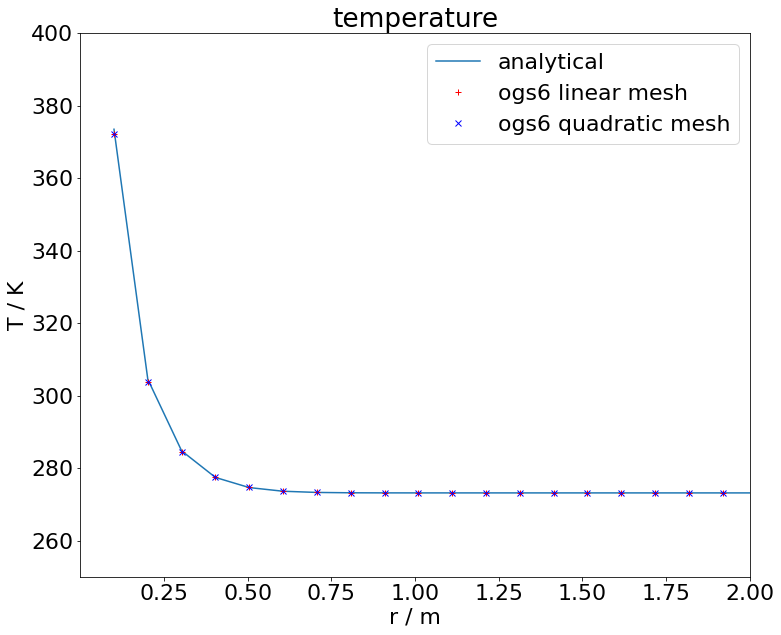

In [180]:
plt.plot(x,ana_model.temperature(x,0,0,t_i), label="analytical")
plt.plot(x, pvd_lin.read_set_data(t_i,"temperature", pointsetarray=r, data_type="point"), 'r+', label="ogs6 linear mesh")
plt.plot(x, pvd_quad.read_set_data(t_i,"temperature_interpolated", pointsetarray=r, data_type="point"), 'bx', label="ogs6 quadratic mesh")
plt.xlim(limits['x']['temp'])
plt.ylim(limits['y']['temp'])
plt.xlabel("r / m")
plt.ylabel("T / K")
plt.legend()
plt.title("temperature")

Text(0.5, 1.0, 'temperature error')

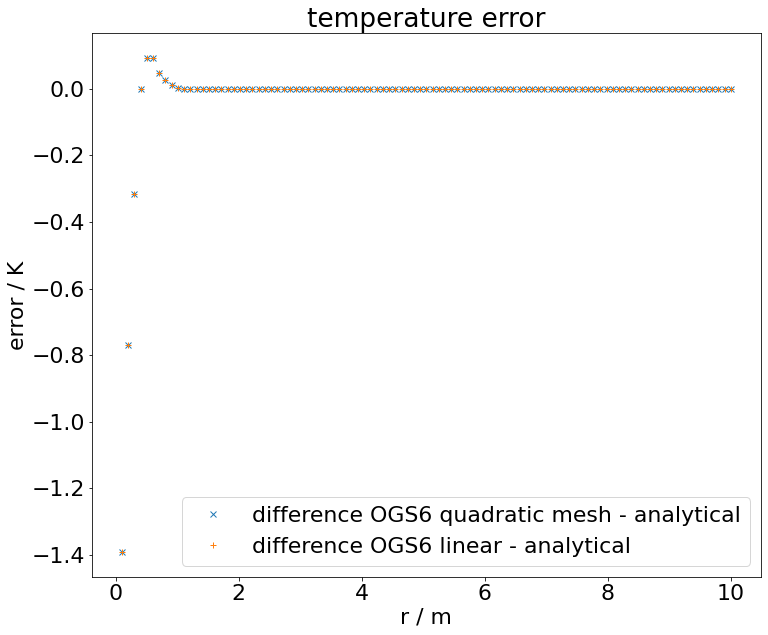

In [181]:
plt.plot(x, pvd_quad.read_set_data(t_i,"temperature_interpolated", pointsetarray=r, data_type="point")-ana_model.temperature(x,0,0,t_i), 'x', label="difference OGS6 quadratic mesh - analytical")
plt.plot(x, pvd_lin.read_set_data(t_i, "temperature", pointsetarray=r, data_type="point")-ana_model.temperature(x,0,0,t_i), '+', label="difference OGS6 linear - analytical")
plt.xlabel("r / m")
plt.ylabel("error / K")
plt.legend()
plt.title("temperature error")

Text(0.5, 1.0, 'pressure')

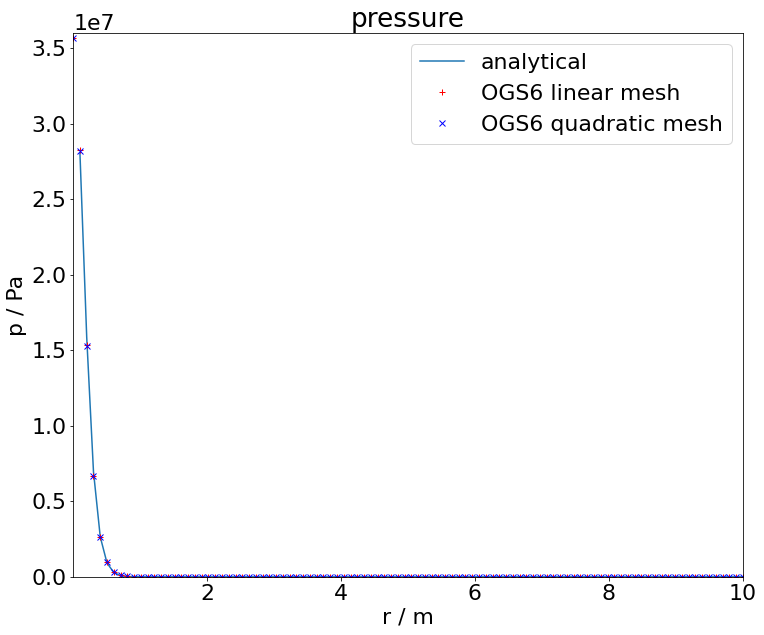

In [182]:
plt.plot(x,ana_model.porepressure(x,0,0,t_i), label="analytical")
plt.plot(x, pvd_lin.read_set_data(t_i,"pressure", pointsetarray=r, data_type="point"), 'r+', label="OGS6 linear mesh")
plt.plot(x, pvd_quad.read_set_data(t_i,"pressure_interpolated", pointsetarray=r, data_type="point"), 'bx', label="OGS6 quadratic mesh")
plt.xlim(limits['x']['press'])
plt.ylim(limits['y']['press'])
plt.xlabel("r / m")
plt.ylabel("p / Pa")
plt.legend()
plt.title("pressure")

Text(0.5, 1.0, 'pressure error')

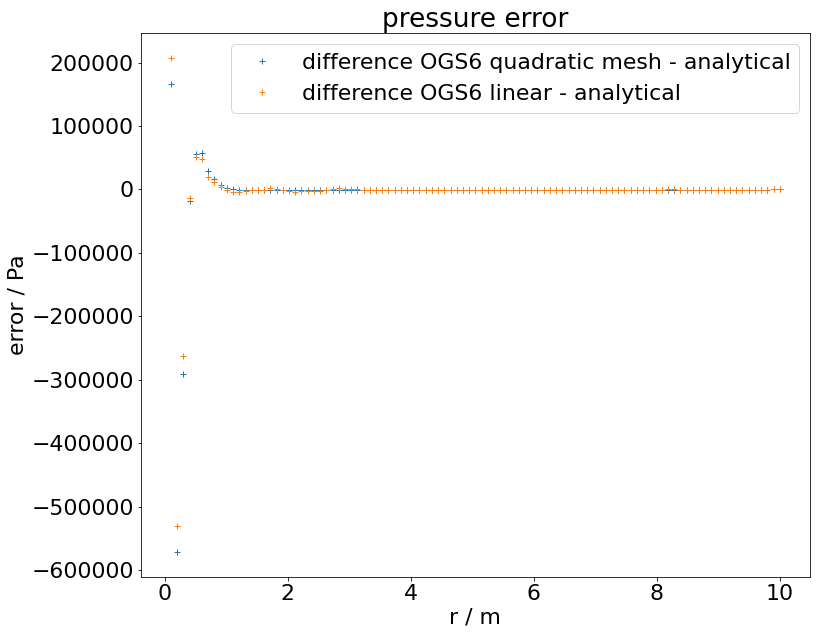

In [183]:
plt.plot(x, pvd_quad.read_set_data(t_i,"pressure_interpolated", pointsetarray=r, data_type="point")-ana_model.porepressure(x,0,0,t_i), '+', label="difference OGS6 quadratic mesh - analytical")
plt.plot(x, pvd_lin.read_set_data(t_i,"pressure", pointsetarray=r, data_type="point")-ana_model.porepressure(x,0,0,t_i), '+', label="difference OGS6 linear - analytical")
plt.xlabel("r / m")
plt.ylabel("error / Pa")
plt.legend()
plt.title("pressure error")

Text(0.5, 1.0, 'displacement')

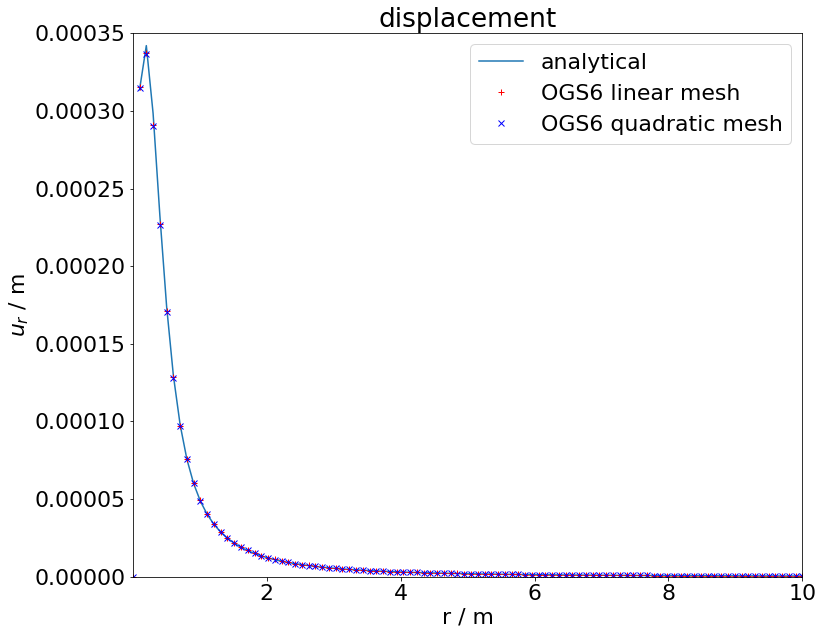

In [184]:
plt.plot(x,ana_model.u_i(x,0,0,t_i, "x"), label="analytical")
plt.plot(x, pvd_lin.read_set_data(t_i,"displacement", pointsetarray=r, data_type="point")[:,0], 'r+', label="OGS6 linear mesh")
plt.plot(x, pvd_quad.read_set_data(t_i,"displacement", pointsetarray=r, data_type="point")[:,0], 'bx', label="OGS6 quadratic mesh")
plt.xlim(limits['x']['displ_x'])
plt.ylim(limits['y']['displ_x'])
plt.xlabel("r / m")
plt.ylabel("$u_r$ / m")
plt.legend()
plt.title("displacement")

Text(0.5, 1.0, 'displacement error')

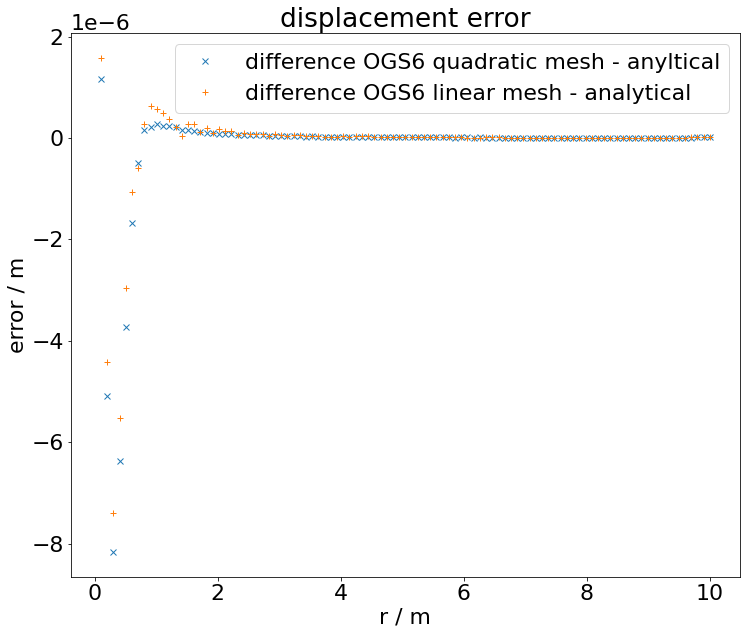

In [185]:
plt.plot(x,pvd_quad.read_set_data(t_i,"displacement", pointsetarray=r, data_type="point")[:,0]-ana_model.u_i(x,0,0,t_i, "x"), 'x', label="difference OGS6 quadratic mesh - anyltical")
plt.plot(x, pvd_lin.read_set_data(t_i,"displacement", pointsetarray=r, data_type="point")[:,0]-ana_model.u_i(x,0,0,t_i, "x"), '+', label="difference OGS6 linear mesh - analytical")
plt.xlabel("r / m")
plt.ylabel("error / m")
plt.legend()
plt.title("displacement error")

The differences observed for the OGS6 results in comparision to the analytical solution can be primarily explained by mesh discretization and finite size effects.

## Execution times

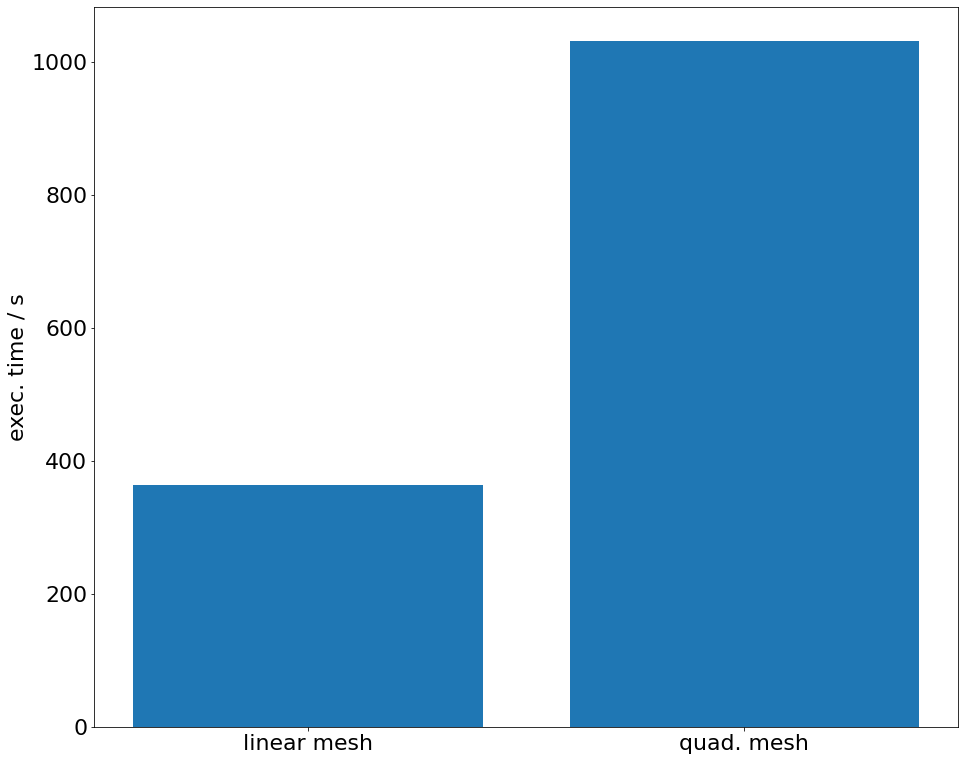

In [186]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mesh = ['linear mesh', 'quad. mesh']
exec_times = [ogs_model_lin.exec_time,ogs_model_quad.exec_time]
ax.bar(mesh,exec_times)
plt.ylabel("exec. time / s")
plt.show()

## References

[1] Booker, J. R.; Savvidou, C. (1985), Consolidation around a point heat source. International Journal for Numerical and Analytical Methods in Geomechanics, 1985, 9. Jg., Nr. 2, S. 173-184.

[2] Chaudhry, A. A.; Buchwald, J.; Kolditz, O. and Nagel, T. (2019), Consolidation around a point heatsource (correction & verification). International Journal for Numerical and Analytical Methods in Geomechanics, 2019, <https://doi.org/10.1002/nag.2998>.